In [1]:
%run constants.py

In [2]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/load_functions"

In [3]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FITS FILES/BAND6/load_band6_data.py"

In [4]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/CARTA FILES/BAND6/load_carta_data_band6.py"

# Find Peak POLI and get POLF

In [5]:
# Find index of max POLI_mJy, ignoring NaNs
y_max, x_max = np.unravel_index(np.nanargmax(POLI_mJy), POLI_mJy.shape)

# Get max POLI_mJy value
max_POLI = POLI_mJy[y_max, x_max]

# Get corresponding Stokes I value at same position
corresponding_I = StokesI_mJy[y_max, x_max]

# Compute calculated polarization fraction
calc_avg_POLF = max_POLI / corresponding_I 

# Get map POLF value
map_avg_POLF = POLF[y_max, x_max]

# Print results
print(rf'The maximum POLI value is {max_POLI:.3f}, and it happens at the index ({y_max}, {x_max})')
print(rf'At that index, the StokesI value is {corresponding_I:.3f}')
print(rf'At that index, the calculated POLF value is {calc_avg_POLF:.4f} or {calc_avg_POLF* 100:.4f}%')
print(rf'At that index, the map POLF value is {map_avg_POLF:.4f}')

The maximum POLI value is 1.329, and it happens at the index (828, 858)
At that index, the StokesI value is 89.449
At that index, the calculated POLF value is 0.0149 or 1.4863%
At that index, the map POLF value is 0.0149


# Stokes I and Polarized Intensity Plot with Vectors

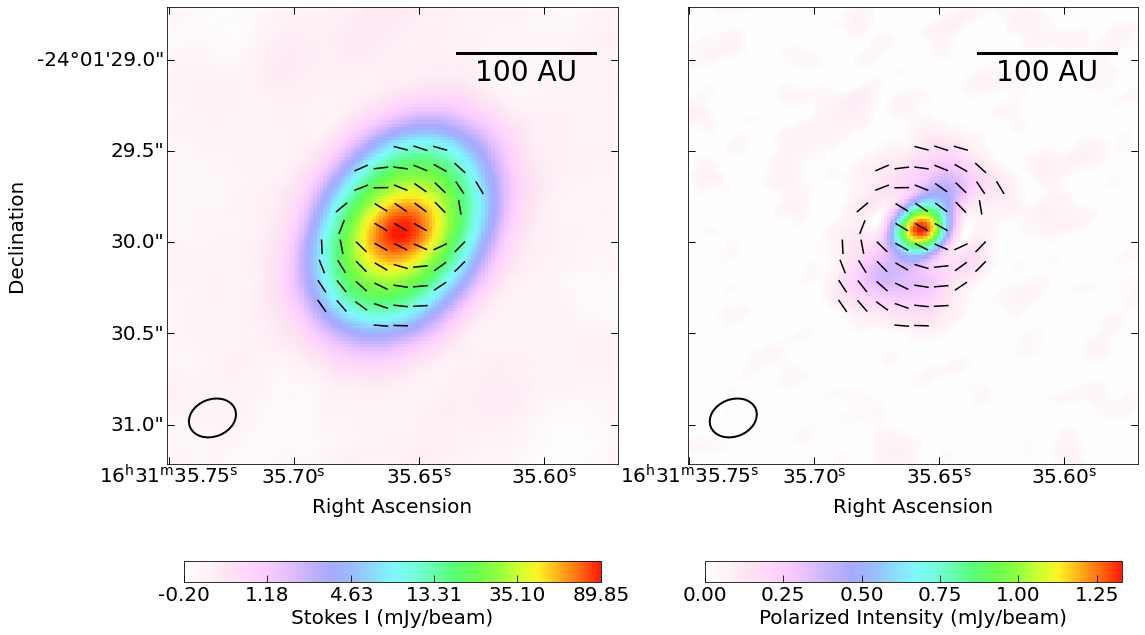

In [6]:
fig, ax = create_stokes_i_plus_one_base_plot(StokesI_wcs, StokesI_stretched_mJy, 
                                             normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                             POLI_mJy, 'Polarized Intensity (mJy/beam)',
                                             soft_colormap_v2, 
                                             xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                             BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                             max_length_pix, reference_fraction)

for row in vector_data_actual_cartesian:
    ax[0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
    
for row in vector_data_actual_cartesian:
    ax[1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
plt.savefig(writeup_image_folder_path + "IRS63_StokesI_POLI_vectors_BAND6.pdf", 
            dpi=300, 
            bbox_inches='tight')    


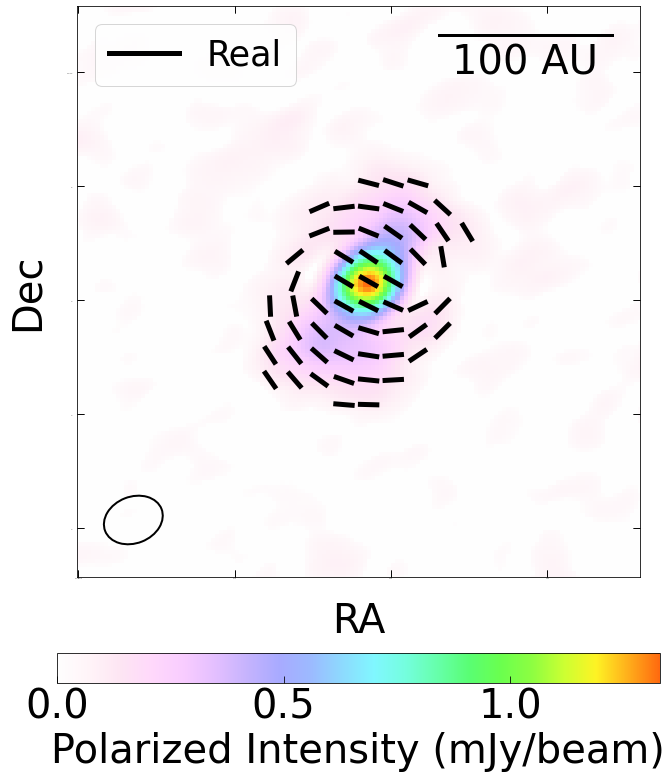

In [7]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction,
                           cbar_fs = 40,
                           axis_label_fs = 40,
                           axis_num_fs = 21,
                           cbar_orientation = 'horizontal',
                           cbar_pad = 0.1,
                           cbar_shrink = 0.9,
                           fig_size_x = 12,
                           fig_size_y = 14,
                           text_fs = 40,
                           y_label = True, y_num = False,
                           x_label = True, x_num = False, 
                           full_axis_labels = False,
                           cbar_num_fs = 40,
                           line_y_frac = 0.05)


first_real = True
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    

ax.legend(fontsize = 35,
         loc = 'upper left')


plt.savefig(slideshow_image_folder_path + "IRS63_POLI_BAND6_slides.jpeg", 
            dpi=300, 
            bbox_inches='tight')  

# Slices Along Major and Minor Axes

In [8]:
major_data_StokesI, major_offset_arcsec_StokesI, minor_data_StokesI, minor_offset_arcsec_StokesI, slices_points = run_slices(StokesI_mJy, 
                                                                                                                             StokesI_header,
                                                                                                                             StokesI_wcs,
                                                                                                                             carta_major_data_mJy_StokesI, 
                                                                                                                             carta_minor_data_mJy_StokesI,
                                                                                                                             carta_minor_offset_StokesI,
                                                                                                                             carta_major_offset_StokesI,
                                                                                                                             band = 6,
                                                                                                                             print_statement = False)

 
in run_slices
The length of major_x, _y, minor_x, _ is: 77 77 77 77
 
in extract_axis_data
gridsize: (1726, 1726)
length of axis_data: 77
length of offset_pixels: 77
length of offset_arcsec: 77
 
 
in extract_axis_data
gridsize: (1726, 1726)
length of axis_data: 77
length of offset_pixels: 77
length of offset_arcsec: 77
 


In [9]:
major_data_POLI, major_offset_arcsec_POLI, minor_data_POLI, minor_offset_arcsec_POLI, _ = run_slices(POLI_mJy, 
                                                                                                     StokesI_header,
                                                                                                     StokesI_wcs, 
                                                                                                     carta_major_data_mJy_POLI,
                                                                                                     carta_minor_data_mJy_POLI,
                                                                                                     carta_minor_offset_POLI,
                                                                                                     carta_major_offset_POLI,
                                                                                                     band = 6,
                                                                                                     print_statement = False)

 
in run_slices
The length of major_x, _y, minor_x, _ is: 77 77 77 77
 
in extract_axis_data
gridsize: (1726, 1726)
length of axis_data: 77
length of offset_pixels: 77
length of offset_arcsec: 77
 
 
in extract_axis_data
gridsize: (1726, 1726)
length of axis_data: 77
length of offset_pixels: 77
length of offset_arcsec: 77
 


In [10]:
major_data_POLF, major_offset_arcsec_POLF, minor_data_POLF, minor_offset_arcsec_POLF, _ = run_slices(POLF, 
                                                                                                     StokesI_header,
                                                                                                     StokesI_wcs, 
                                                                                                     carta_major_data_POLF,
                                                                                                     carta_minor_data_POLF,
                                                                                                     carta_minor_offset_POLF,
                                                                                                     carta_major_offset_POLF,
                                                                                                     band = 6,
                                                                                                     print_statement = True)

 
in run_slices
The length of major_x, _y, minor_x, _ is: 77 77 77 77
 
in extract_axis_data
gridsize: (1726, 1726)
length of axis_data: 77
length of offset_pixels: 77
length of offset_arcsec: 77
 
 
in extract_axis_data
gridsize: (1726, 1726)
length of axis_data: 77
length of offset_pixels: 77
length of offset_arcsec: 77
 
The major angle (cartesian) is: 238.0 degrees
The minor angle (cartesian) is: 148.0 degrees
 
Major start: (837.392, 794.020) pixels
Major end:   (878.608, 859.980) pixels
Minor start: (825.020, 847.608) pixels
Minor end:   (890.980, 806.392) pixels
 
RA_centre_pix =  858
Dec_centre_pix =  827


In [11]:
major_x, major_y, minor_x, minor_y = slices_points

Chi-squared comparison between user and CARTA slices:
  Minor axis values χ²: 113.118
  Major axis values χ²: 101.076
  Minor axis offset χ²: 0.009
  Major axis offset χ²: 0.009
 
Fitting the slope of the slices:
  Major Axis α:
    Mine : 1.2 (pos) and 1.2 (neg)
    CARTA: 1.1 (pos) and 1.1 (neg)
  Minor Axis α:
    Mine : 2.1 (pos) and 2.2 (neg)
    CARTA: 1.9 (pos) and 2.0 (neg)


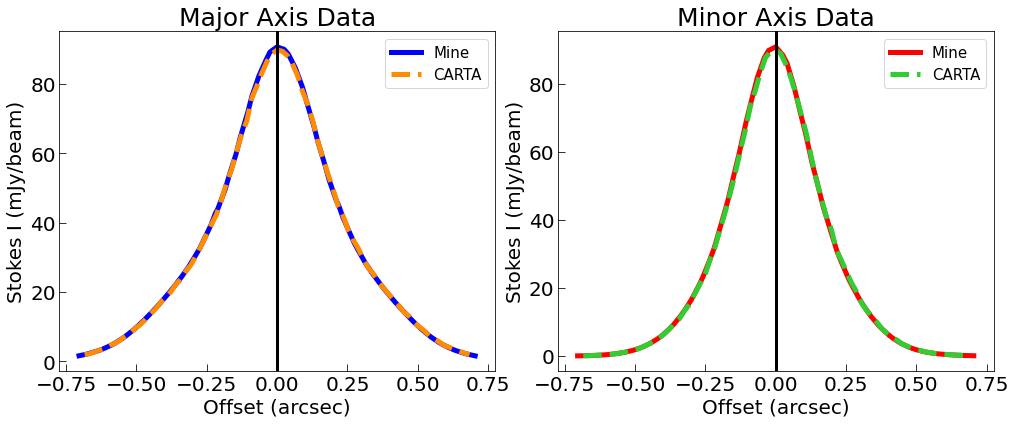

In [12]:
ax = plot_slices_along_axes(
    major_data_StokesI,
    minor_data_StokesI,
    carta_major_data_mJy_StokesI,
    carta_minor_data_mJy_StokesI,
    major_offset_arcsec_StokesI,
    minor_offset_arcsec_StokesI,
    carta_major_offset_StokesI,
    carta_minor_offset_StokesI,
    BMAJ_deg, BMIN_deg, 
    y_label="Stokes I (mJy/beam)",
    type_of_plot="Line",  # or "Scatter",
    cb_friendly = False,
    vline = True,
    fit_slices = True
)

# plt.savefig(image_folder_path + "IRS63_StokesI_slice_BAND6.pdf", 
#             dpi=300, 
#             bbox_inches='tight')   


Chi-squared comparison between user and CARTA slices:
  Minor axis values χ²: 0.043
  Major axis values χ²: 0.027
  Minor axis offset χ²: 0.009
  Major axis offset χ²: 0.009
 
Fitting the slope of the slices:
  Major Axis α:
    Mine : 2.8 (pos) and 1.8 (neg)
    CARTA: 1.6 (pos) and 1.8 (neg)
  Minor Axis α:
    Mine : 3.0 (pos) and 2.9 (neg)
    CARTA: 2.7 (pos) and 2.3 (neg)


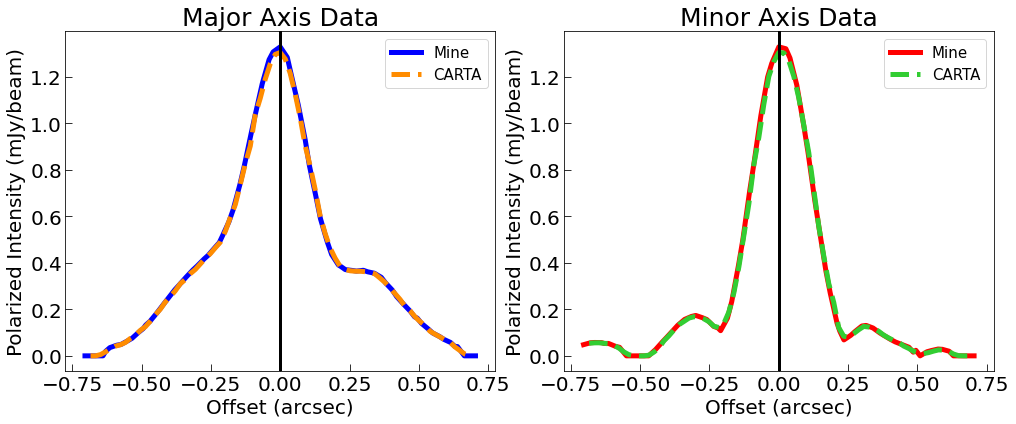

In [13]:
ax = plot_slices_along_axes(
    major_data_POLI,
    minor_data_POLI,
    carta_major_data_mJy_POLI,
    carta_minor_data_mJy_POLI,
    major_offset_arcsec_POLI,
    minor_offset_arcsec_POLI,
    carta_major_offset_POLI,
    carta_minor_offset_POLI,
    BMAJ_deg, BMIN_deg, 
    y_label="Polarized Intensity (mJy/beam)",
    type_of_plot="Line",  # "Line" or "Scatter",
    cb_friendly = False,
    vline = True,
    fit_slices = True
)


# plt.savefig(image_folder_path + "IRS63_POLI_slice_BAND6.pdf", 
#             dpi=300, 
#             bbox_inches='tight') 
 

In [14]:
len(major_data_POLF)

77

Chi-squared comparison between user and CARTA slices:
  Minor axis values χ²: 0.060
  Major axis values χ²: 0.000
  Minor axis offset χ²: 0.009
  Major axis offset χ²: 0.009
 
Fitting the slope of the slices:
  Major Axis α:
    Mine : 1.7 (pos) and 3.1 (neg)
    CARTA: 0.5 (pos) and 0.8 (neg)
  Minor Axis α:
    Mine : 1.4 (pos) and 0.3 (neg)
    CARTA: 0.8 (pos) and 0.3 (neg)


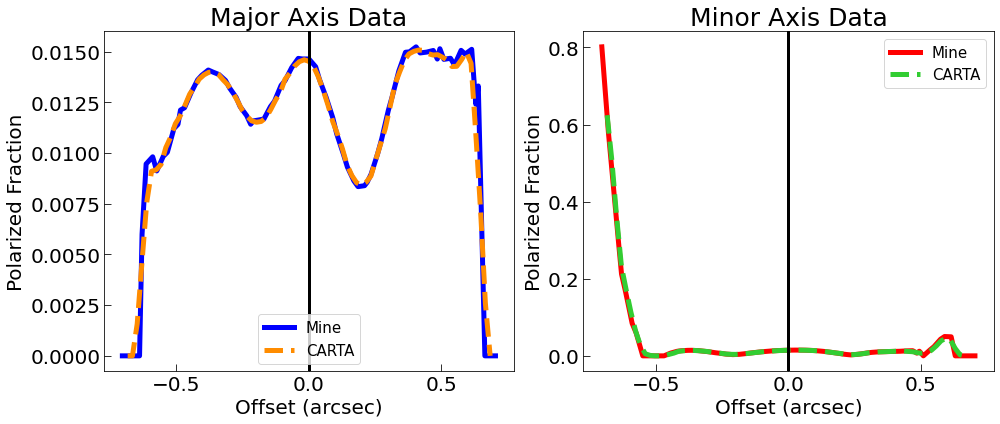

In [15]:
ax = plot_slices_along_axes(
    major_data_POLF,
    minor_data_POLF,
    carta_major_data_POLF,
    carta_minor_data_POLF,
    major_offset_arcsec_POLF,
    minor_offset_arcsec_POLF,
    carta_major_offset_POLF,
    carta_minor_offset_POLF,
    BMAJ_deg, BMIN_deg, 
    y_label="Polarized Fraction",
    type_of_plot="Line",  # "Line" or "Scatter",
    cb_friendly = False,
    vline = True,
    fit_slices = True
)


# plt.savefig(image_folder_path + "IRS63_POLF_slice_BAND6.pdf", 
#             dpi=300, 
#             bbox_inches='tight')   

In [16]:
data_dict = {
    "StokesI_major"         : major_data_StokesI,
    "StokesI_offset_major": major_offset_arcsec_StokesI,
    "StokesI_minor"         : minor_data_StokesI,
    "StokesI_offset_minor": minor_offset_arcsec_StokesI
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Save to CSV
df.to_csv(band6_carta_folder_path + "IRS63_my_slice_StokesI_BAND6.csv", index=False)

In [17]:
data_dict = {
    "POLI_major"         : major_data_POLI,
    "POLI_offset_major": major_offset_arcsec_POLI,
    "POLI_minor"         : minor_data_POLI,
    "POLI_offset_minor": minor_offset_arcsec_POLI
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Save to CSV
df.to_csv(band6_carta_folder_path + "IRS63_my_slice_POLI_BAND6.csv", index=False)

In [18]:
data_dict = {
    "POLF_major"         : major_data_POLF,
    "POLF_offset_major": major_offset_arcsec_POLF,
    "POLF_minor"         : minor_data_POLF,
    "POLF_offset_minor": minor_offset_arcsec_POLF
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Save to CSV
df.to_csv(band6_carta_folder_path + "IRS63_my_slice_POLF_BAND6.csv", index=False)

# Fitting the slices


$I(r) \propto r^\alpha$

Take log of both sides:
$\log_{10}(I(r))=\alpha \log_{10}(r)+C$

We need to comvert the data from mJy/beam to mJy/arcsec$^2$ (or radians will also work).

We can calculate the beam area with the equation:
$1.113 \cdot BMAJ \cdot BMIN$,
where $BMAJ$ and $BMIN$

# Ratio Models

In [19]:
vector_data_plotting_grid, vector_data_list_100U_to_100A, testing_vector_angles = ratio_model_band6(StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
                                                                                           StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal,
                                                                                           ny, nx,
                                                                                           vector_length_pix_const,
                                                                                           StokesI_mJy, StokesI_err_mJy,
                                                                                           POLI_mJy, POLI_err_mJy, 
                                                                                           PA_err_deg,
                                                                                           # step = 10,
                                                                                           )

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


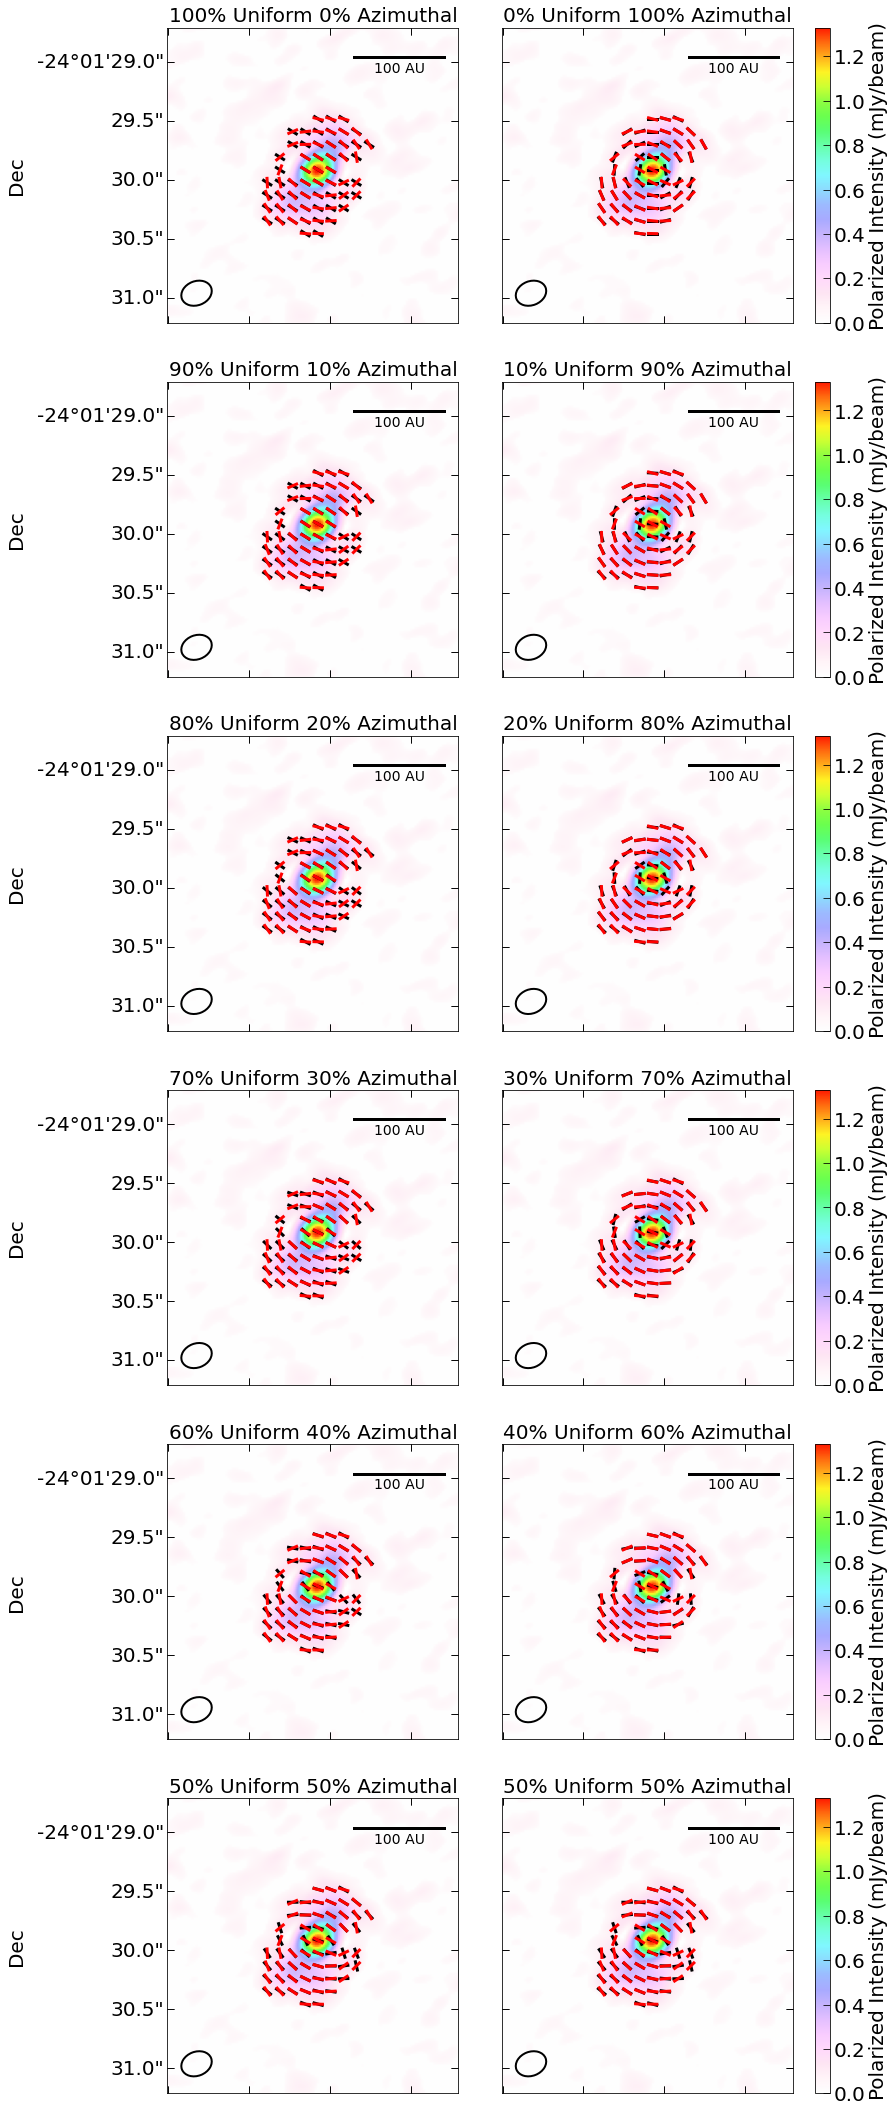

In [20]:
ax = plot_ratio_grid(POLI_mJy,
                    StokesI_wcs, soft_colormap_v2, 
                    xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                    BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                    max_length_pix, reference_fraction,
                    vector_data_actual_cartesian, vector_data_plotting_grid)

## Find the best one

In [21]:
min_index = find_best_fit_ratio_model(vector_angle_actual_sky, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = 0.379
  90 U 10 A: χ² = 0.360
  80 U 20 A: χ² = 0.341
  70 U 30 A: χ² = 0.328
  60 U 40 A: χ² = 0.331
  50 U 50 A: χ² = 0.450
  40 U 60 A: χ² = 0.355
  30 U 70 A: χ² = 0.278
  20 U 80 A: χ² = 0.272
  10 U 90 A: χ² = 0.230
  0 U 100 A: χ² = 0.236

Best-fit ratio model: 10 U 90 A (χ² = 0.230)


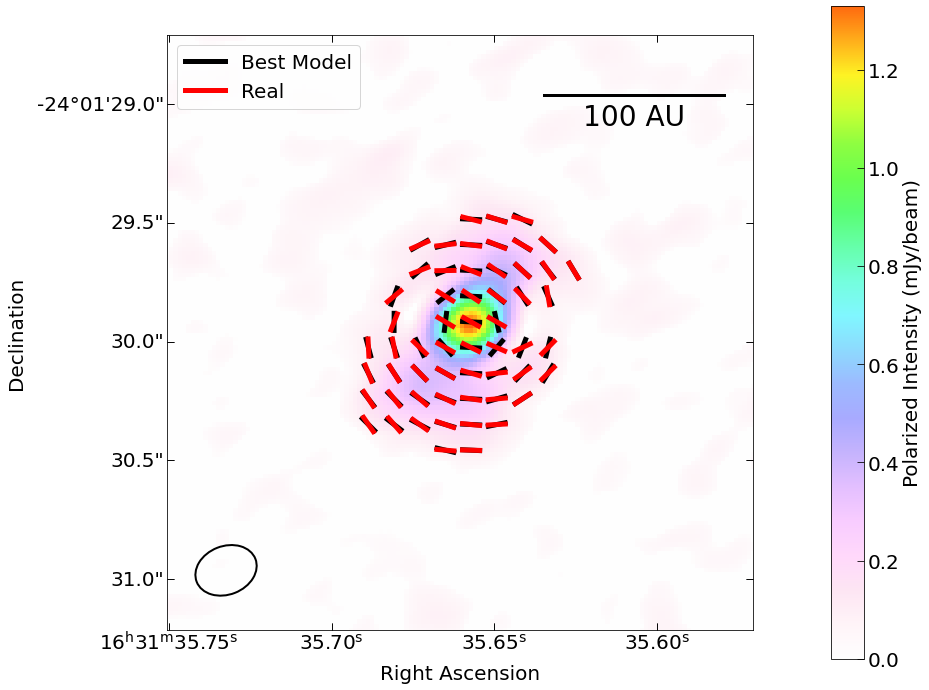

In [22]:
fig, ax = create_base_plot(StokesI_wcs, POLI_mJy, 'Polarized Intensity (mJy/beam)' , 
                           soft_colormap_no_red, 
                           xmin, xmax , ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add vector plots (Best Model: black)
for i, row in enumerate(vector_data_list_100U_to_100A[min_index]):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, label='Best Model')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5)

# Plot actual vector data (Real: red)
for i, row in enumerate(vector_data_actual_cartesian):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, label='Real')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5)

# Show legend
ax.legend(fontsize=legend_title_fs, loc = 'best')


plt.savefig(writeup_image_folder_path + "IRS63_best_ratio_BAND6.pdf", 
            dpi=300, 
            bbox_inches='tight')   


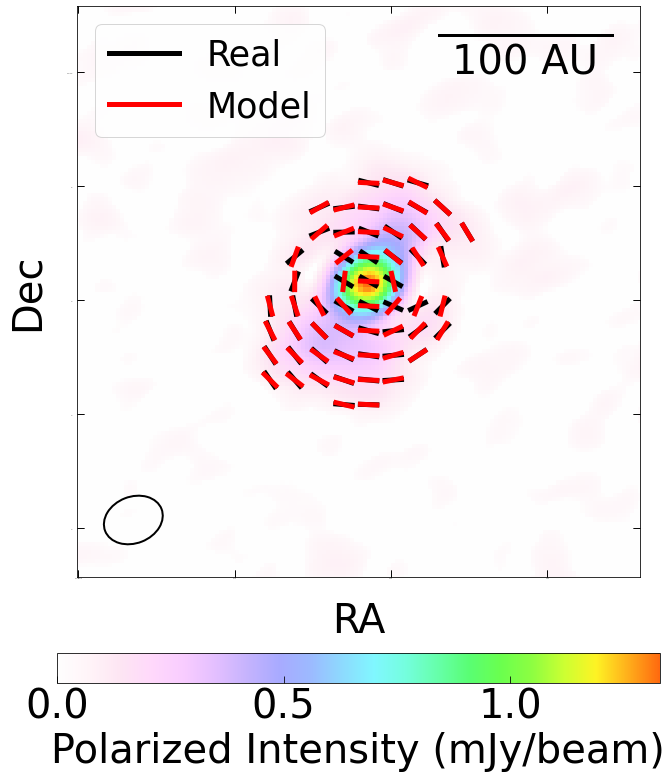

In [23]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction,
                           cbar_fs = 40,
                           axis_label_fs = 40,
                           axis_num_fs = 21,
                           cbar_orientation = 'horizontal',
                           cbar_pad = 0.1,
                           cbar_shrink = 0.9,
                           fig_size_x = 12,
                           fig_size_y = 14,
                           text_fs = 40,
                           y_label = True, y_num = False,
                           x_label = True, x_num = False, 
                           full_axis_labels = False,
                           cbar_num_fs = 40,
                           line_y_frac = 0.05)



# Plot actual vector data (Real: red)
for i, row in enumerate(vector_data_actual_cartesian):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, label='Real')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5)
        
        
# Add vector plots (Best Model: black)
for i, row in enumerate(vector_data_list_100U_to_100A[min_index]):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, label='Model')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5)


# Show legend
ax.legend(fontsize = 35,
         loc = 'upper left')

plt.savefig(slideshow_image_folder_path + "IRS63_best_ratio_BAND6_slides.jpeg", 
            dpi=300, 
            bbox_inches='tight')  

# Gaussian Model 

In [24]:
phi_values = [2, 3, 4, 5, 6, 7]


BMAJ_values_pix =  np.array([10, 20, 30, 40, 50]) # + np.array(BMAJ_pix, dtype=int)
BMIN_values_pix =  np.array([10, 20, 30, 40, 50]) # + np.array(BMIN_pix, dtype=int)

# Print results
print(f'The BMAJ pix values we will test are: {BMAJ_values_pix}')
print(f'The BMIN pix values we will test are: {BMIN_values_pix}')

The BMAJ pix values we will test are: [10 20 30 40 50]
The BMIN pix values we will test are: [10 20 30 40 50]


In [25]:
gaussian_values, gaussian_results, vector_data_gaussian_best, GaussianUniformRatios_best = run_gaussian_model_band6(major_angle_rad_cartesian_band6, phi_values, 
                                                                                                                    BMAJ_values_pix, BMIN_values_pix, 
                                                                                                                    RA_centre_pix, Dec_centre_pix, 
                                                                                                                    StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
                                                                                                                    StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal,
                                                                                                                    vector_angle_actual_sky,
                                                                                                                    ny, nx, 
                                                                                                                    StokesI_mJy, StokesI_err_mJy,
                                                                                                                    POLI_mJy, POLI_err_mJy, 
                                                                                                                    PA_err_deg,
                                                                                                                    print_statements = True)

The lowest chi-squared value is: χ² = 0.087 when
    phi  = 3.00
    BMAJ = 20.00
    BMIN = 20.00


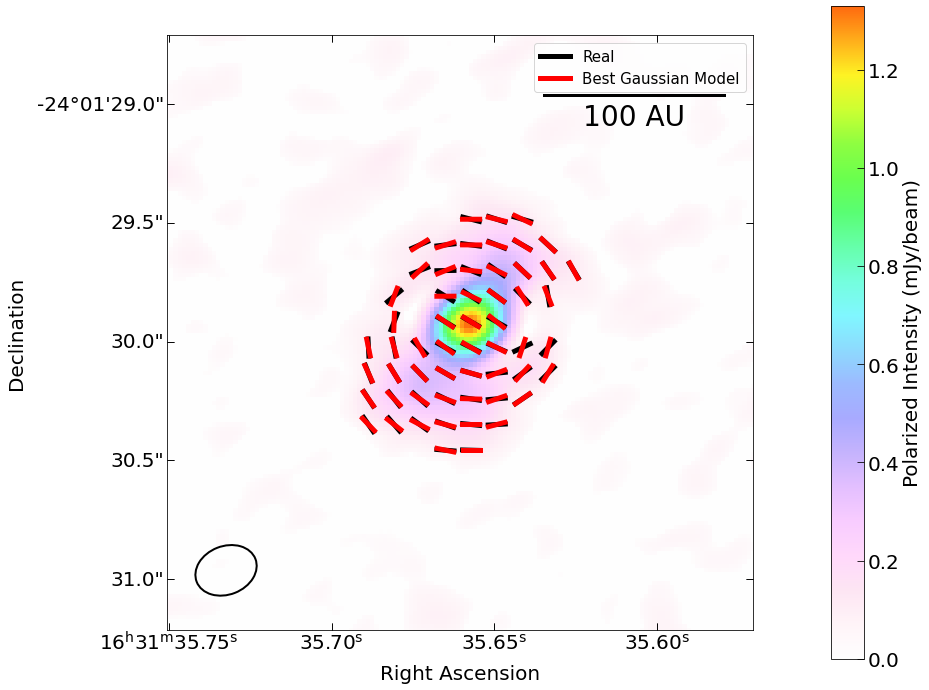

In [26]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

first_real = True
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Best Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs)


plt.savefig(writeup_image_folder_path + "IRS63_best_gaussian_BAND6.pdf", 
            dpi=300, 
            bbox_inches='tight')   

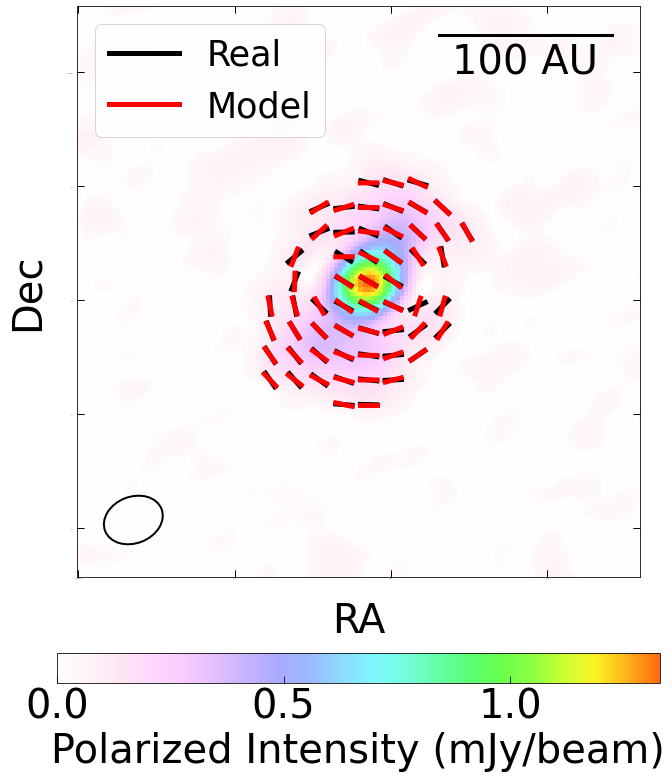

In [27]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction,
                           cbar_fs = 40,
                           axis_label_fs = 40,
                           axis_num_fs = 21,
                           cbar_orientation = 'horizontal',
                           cbar_pad = 0.1,
                           cbar_shrink = 0.9,
                           fig_size_x = 12,
                           fig_size_y = 14,
                           text_fs = 40,
                           y_label = True, y_num = False,
                           x_label = True, x_num = False, 
                           full_axis_labels = False,
                           cbar_num_fs = 40,
                           line_y_frac = 0.05)



# Plot actual vector data (Real: red)
for i, row in enumerate(vector_data_actual_cartesian):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, label='Real')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5)
        
        
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Model' if first_best_model else None)
    first_best_model = False


# Show legend
ax.legend(fontsize = 35,
         loc = 'upper left')

plt.savefig(slideshow_image_folder_path + "IRS63_best_guassian_BAND6_slides.jpeg", 
            dpi=300, 
            bbox_inches='tight')  

## Average POLF when Scattering

In [28]:
POLF_average = get_average_POLF_where_scattered(GaussianUniformRatios_best, POLF, tolerance = 0.03)
print(rf'The average POLF where self-scattering is: {POLF_average:.3f}')

The average POLF where self-scattering is: 0.014


In [29]:
np.nanmin(StokesU_err_mJy)

0.027

In [30]:
np.nanmax(StokesU_err_mJy)

0.26697335

## Analyze Gaussian

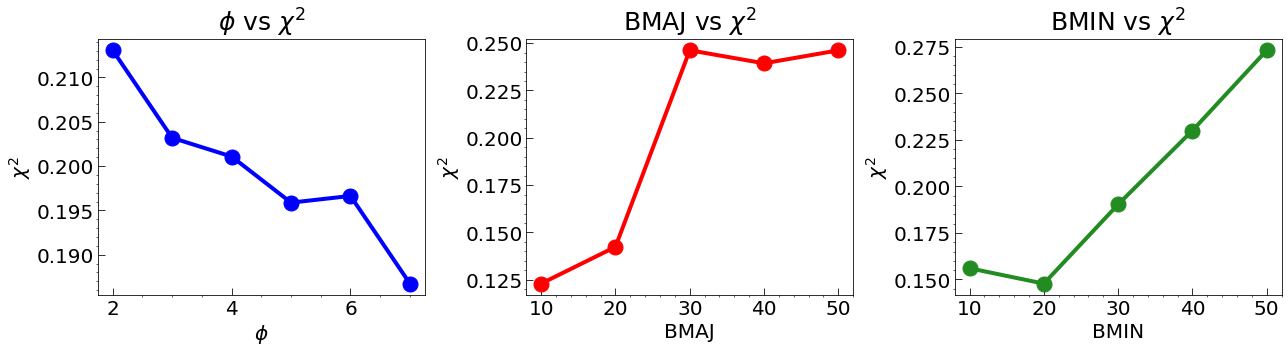

In [31]:
analyze_gaussian_averages_vs_chi2(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix)

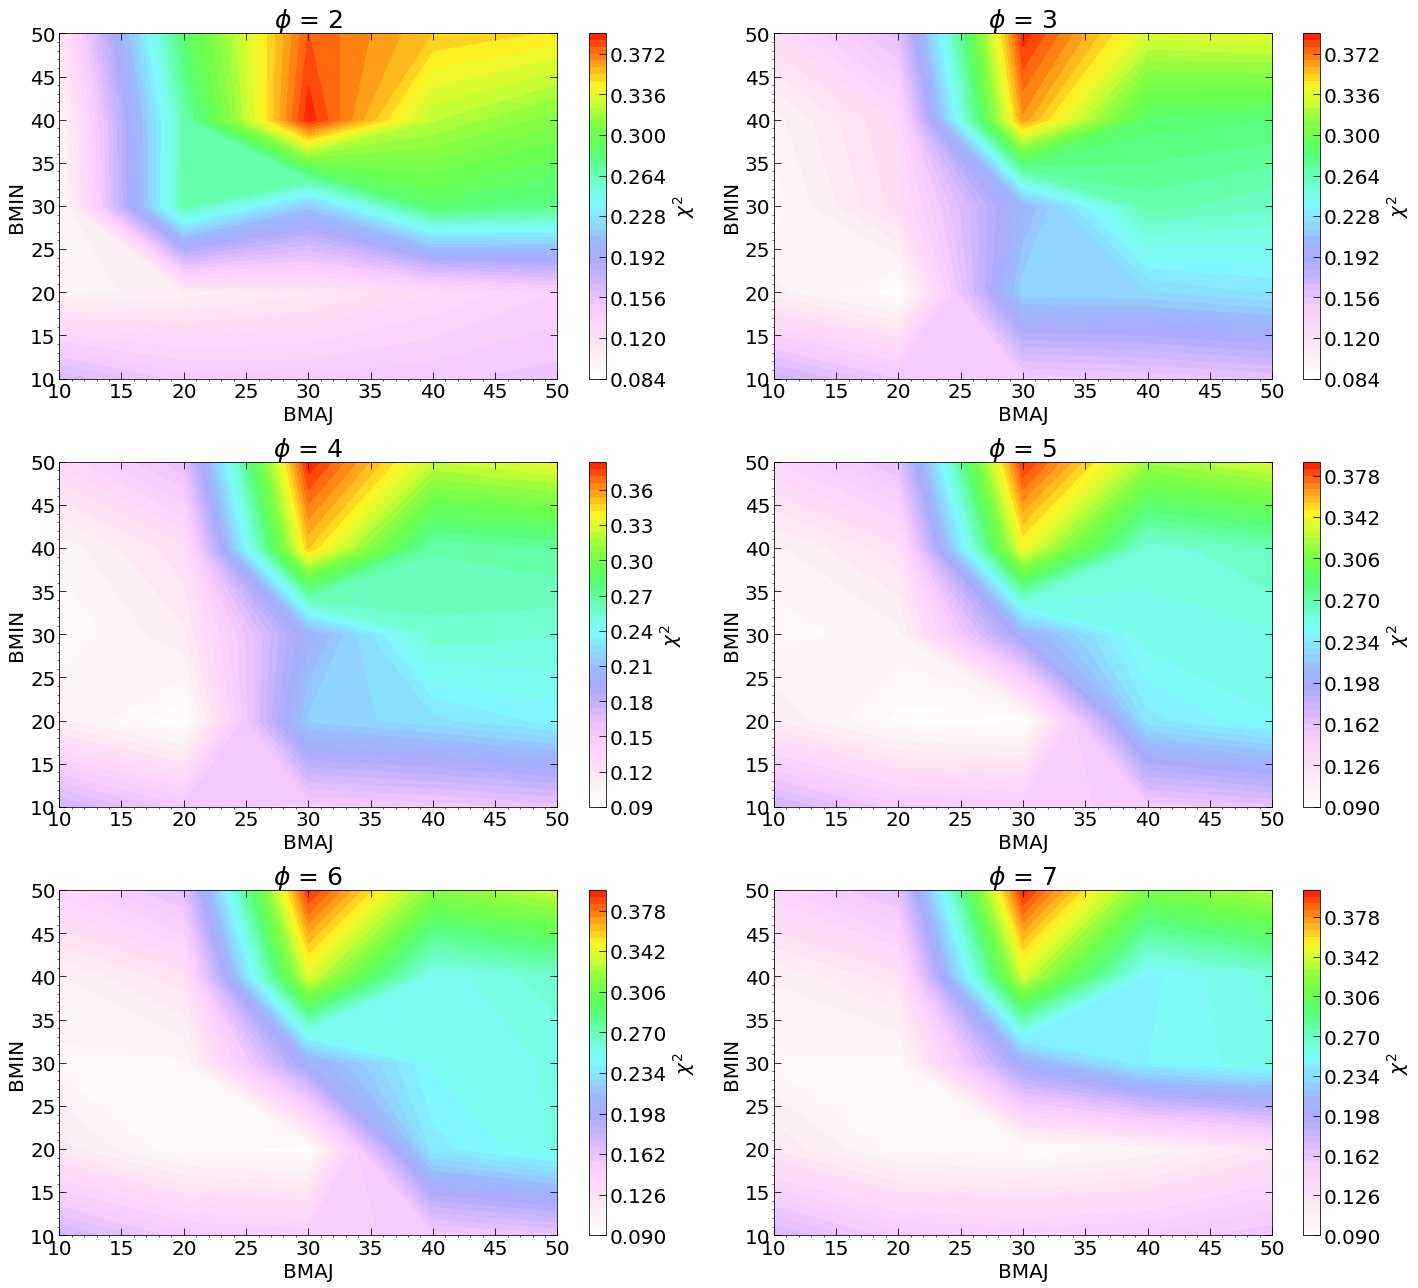

In [32]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'phi', soft_colormap_v2)

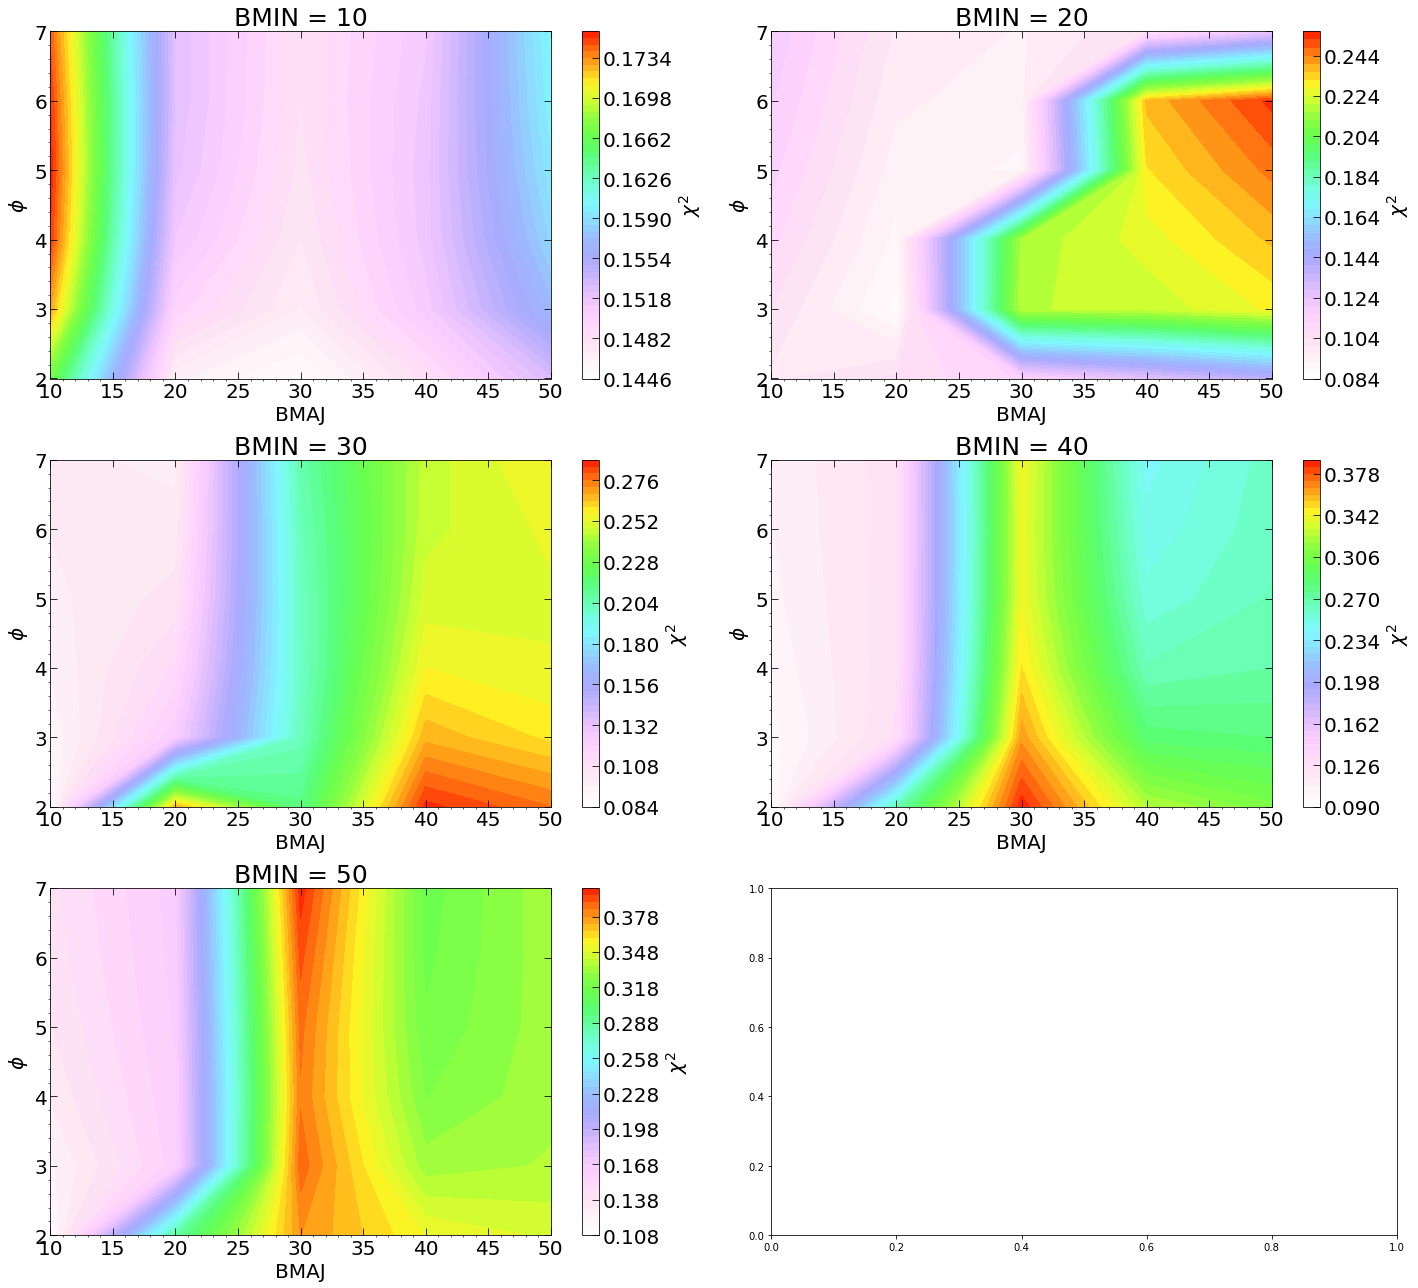

In [33]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'BMIN', soft_colormap_v2)

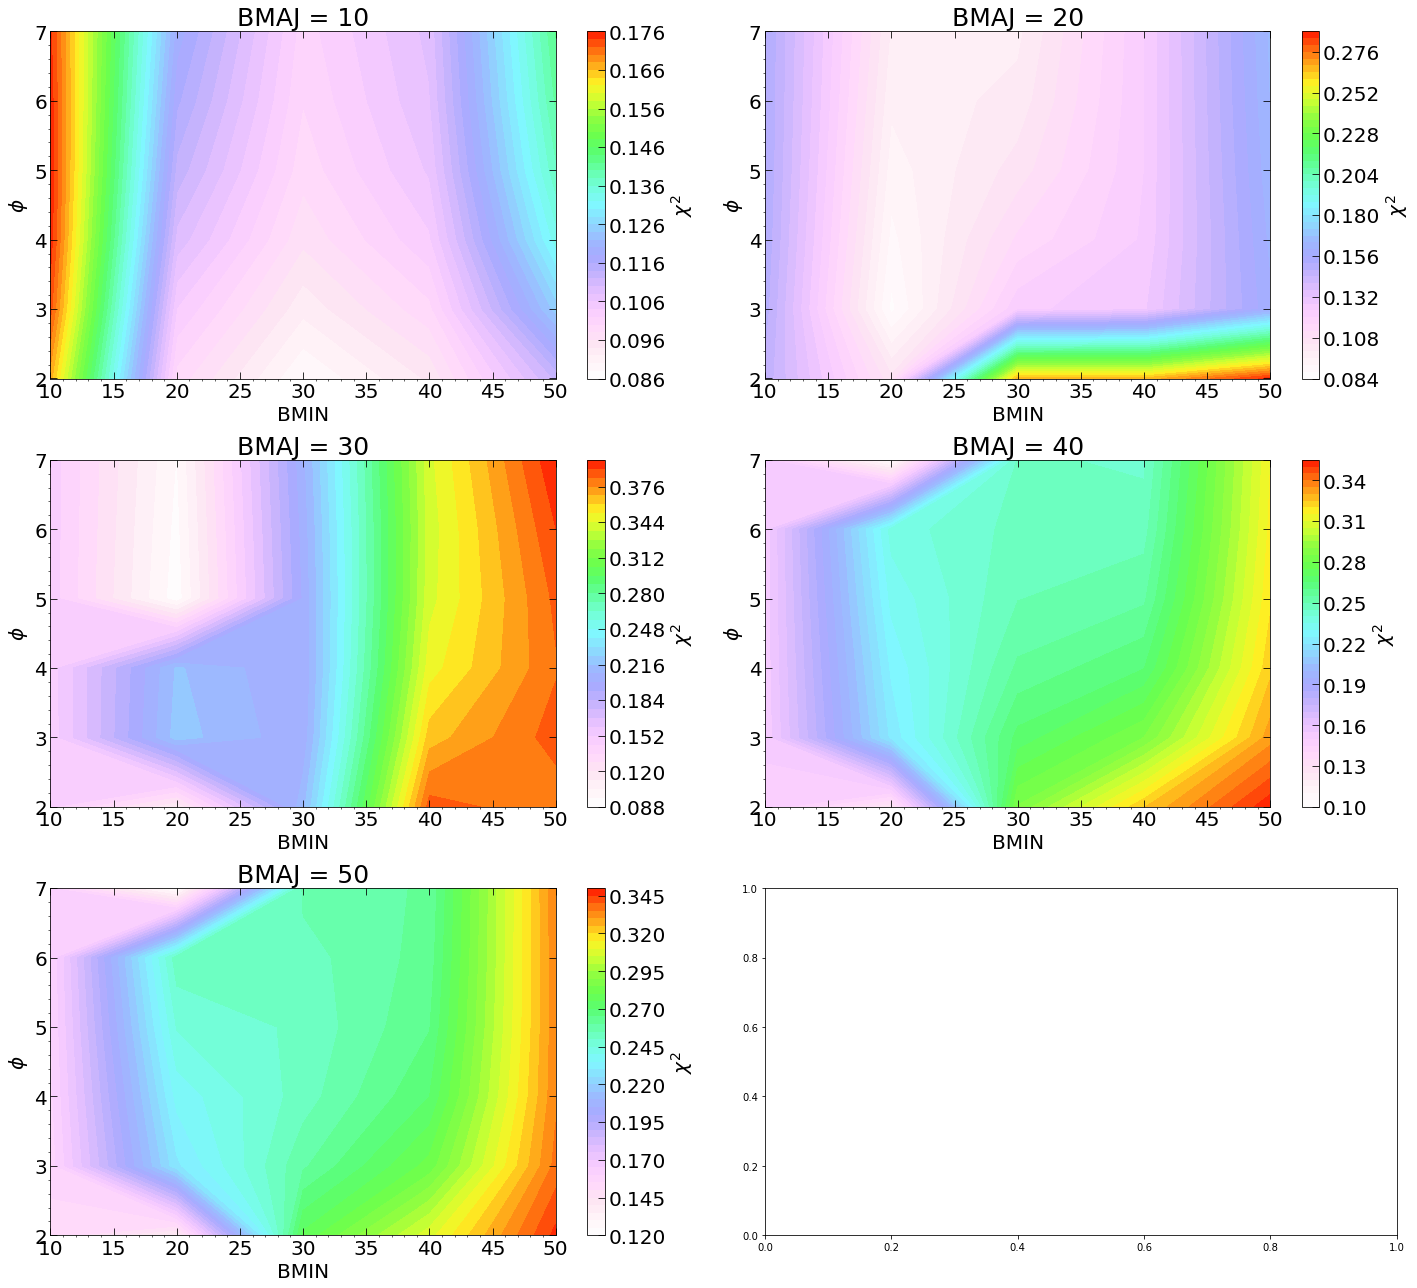

In [34]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'BMAJ', soft_colormap_v2)

##### 